# Otimização com Muitos Objetivos por Evolução Diferencial Aplicada ao Escalonamento Dinâmico de Projeto de Software


### QP2. Comparacao entre algoritmos base

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare
import scikit_posthocs as sp

from dspsp_analysis import metrics_dataset

%matplotlib inline

pd.set_option('display.float_format', '{:.2E}'.format)

data = metrics_dataset(filepath="../hypervolume/metrics-rq2.csv")

dataAcc = metrics_dataset(filepath="../hypervolume/accuracy-rq2.csv", metric="accuracy")
dataStab = metrics_dataset(filepath="../hypervolume/stability-rq2.csv", metric="stability")

alpha = 0.05 # nível de significância

# configuração do gráfico de comparação pareada
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [2]:
def hv_mean(data, instance_id, algorithm_id, grouping="event", metric="hypervolume"):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", grouping], as_index=False)[metric].mean()
    return df


def hv_measures(data, grouping="event", limit=None, metric="hypervolume"):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            measures[inst][alg] = hv_mean(data, inst, alg, grouping, metric)[:limit]
    return measures

def hv_measures_nonzero(data, grouping="event", limit=None):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            mean = hv_mean(data, inst, alg, grouping)[:limit]
            measures[inst][alg] = mean[mean.hypervolume != 0]
    return measures


def mean_hypervolume(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["hypervolume"].agg(['mean', 'std'])

def mean_accuracy(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["accuracy"].agg(['mean', 'std'])

def mean_stability(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["stability"].agg(['mean', 'std'])

def plot_hv(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Hipervolume")
    for alg in algorithms:
        plt.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    
def plot_acc(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Acurácia")
    for alg in algorithms:
        plt.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    
def plot_stab(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Estabilidade")
    for alg in algorithms:
        plt.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="upper left")
    plt.show()
    

def boxplot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.ylabel("Hipervolume")
    plt.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    plt.show()
    

def combined_plot_hv(data, inst, algorithms, ylabel="Hipervolume"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_acc(data, inst, algorithms, ylabel="Acurácia"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].accuracy for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_stab(data, inst, algorithms, ylabel="Estabilidade"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].stability for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    

In [3]:
mean_hv = mean_hypervolume(data).reset_index()
mean_hv.pivot(index='algorithm', columns='instance')

mean                          \
instance     ST10_DT10_SE15_DE1_SK6-7 ST10_DT10_SE5_DE1_SK4-5   
algorithm                                                       
CMODE                        7.76E-01                1.20E+00   
CMODESDE                     7.78E-01                1.18E+00   
CMODESDENorm                 7.54E-01                1.20E+00   

                                                               \
instance     ST20_DT10_SE5_DE1_SK6-7 ST30_DT10_SE15_DE1_SK4-5   
algorithm                                                       
CMODE                       9.14E-01                 8.48E-01   
CMODESDE                    9.02E-01                 8.53E-01   
CMODESDENorm                9.09E-01                 8.50E-01   

                                  std                          \
instance     ST10_DT10_SE15_DE1_SK6-7 ST10_DT10_SE5_DE1_SK4-5   
algorithm                                                       
CMODE                        4.23E-01                3.09E-01   
CMODESDE                     4.23E-01                3.05E-01   
CMODESDENorm                 4.28E-01                3.09E-01   

                                                               
instance     ST20_DT10_SE5_DE1_SK6-7 ST30_DT10_SE15_DE1_SK4-5  
algorithm                                                      
CMODE                       3.77E-01                 4.45E-01  
CMODESDE                    3.69E-01                 4.46E-01  
CMODESDENorm                3.75E-01                 4.50E-01

In [4]:
mean_acc = mean_accuracy(dataAcc).reset_index()
mean_acc.pivot(index='algorithm', columns='instance')

mean                          \
instance     ST10_DT10_SE15_DE1_SK6-7 ST10_DT10_SE5_DE1_SK4-5   
algorithm                                                       
CMODE                        6.24E-01                8.67E-01   
CMODESDE                     6.24E-01                8.64E-01   
CMODESDENorm                 6.05E-01                8.69E-01   

                                                               \
instance     ST20_DT10_SE5_DE1_SK6-7 ST30_DT10_SE15_DE1_SK4-5   
algorithm                                                       
CMODE                       8.31E-01                 7.80E-01   
CMODESDE                    8.29E-01                 7.79E-01   
CMODESDENorm                8.30E-01                 7.78E-01   

                                  std                          \
instance     ST10_DT10_SE15_DE1_SK6-7 ST10_DT10_SE5_DE1_SK4-5   
algorithm                                                       
CMODE                        2.88E-01                1.64E-01   
CMODESDE                     2.87E-01                1.63E-01   
CMODESDENorm                 2.92E-01                1.64E-01   

                                                               
instance     ST20_DT10_SE5_DE1_SK6-7 ST30_DT10_SE15_DE1_SK4-5  
algorithm                                                      
CMODE                       2.00E-01                 2.76E-01  
CMODESDE                    1.99E-01                 2.76E-01  
CMODESDENorm                2.00E-01                 2.75E-01

In [5]:
mean_stab = mean_stability(dataStab).reset_index()
mean_stab.pivot(index='algorithm', columns='instance')

mean                          \
instance     ST10_DT10_SE15_DE1_SK6-7 ST10_DT10_SE5_DE1_SK4-5   
algorithm                                                       
CMODE                        5.40E-02                1.15E-01   
CMODESDE                     7.85E-02                1.02E-01   
CMODESDENorm                 7.42E-02                9.84E-02   

                                                               \
instance     ST20_DT10_SE5_DE1_SK6-7 ST30_DT10_SE15_DE1_SK4-5   
algorithm                                                       
CMODE                       7.53E-02                 6.97E-02   
CMODESDE                    7.20E-02                 8.56E-02   
CMODESDENorm                6.33E-02                 6.54E-02   

                                  std                          \
instance     ST10_DT10_SE15_DE1_SK6-7 ST10_DT10_SE5_DE1_SK4-5   
algorithm                                                       
CMODE                        4.19E-01                7.55E-01   
CMODESDE                     6.06E-01                7.59E-01   
CMODESDENorm                 5.61E-01                7.14E-01   

                                                               
instance     ST20_DT10_SE5_DE1_SK6-7 ST30_DT10_SE15_DE1_SK4-5  
algorithm                                                      
CMODE                       3.90E-01                 5.44E-01  
CMODESDE                    3.85E-01                 6.70E-01  
CMODESDENorm                3.01E-01                 5.56E-01

In [6]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=60)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=60, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=59, metric="stability")

## Comparação entre os algoritmos SEM o uso de estratégias dinâmicas

### Instância ST10_DT10_SE5_DE1_SK4-5

None

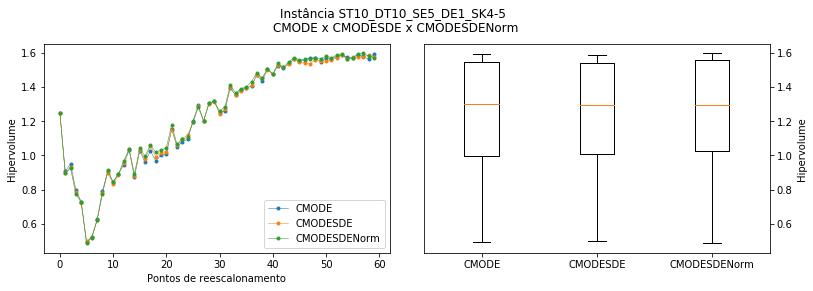

In [7]:
inst = "ST10_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODE", "CMODESDE", "CMODESDENorm"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

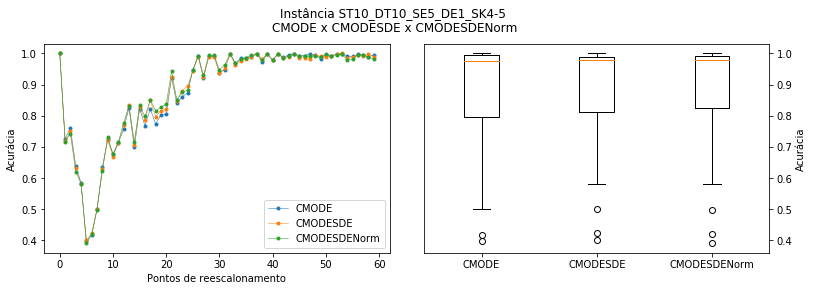

In [8]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

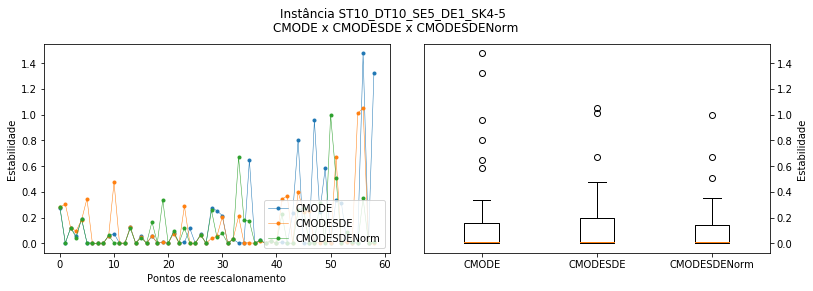

In [9]:
display(combined_plot_stab(stab_event, inst, algorithms))

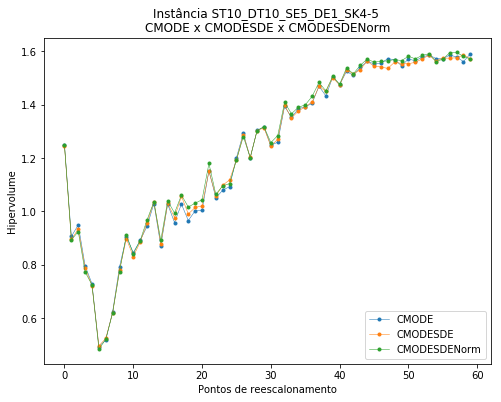

In [10]:
plot_hv(hv_event, inst, algorithms)

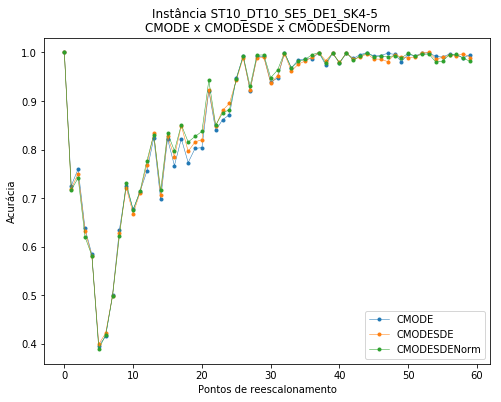

In [11]:
plot_acc(acc_event, inst, algorithms)

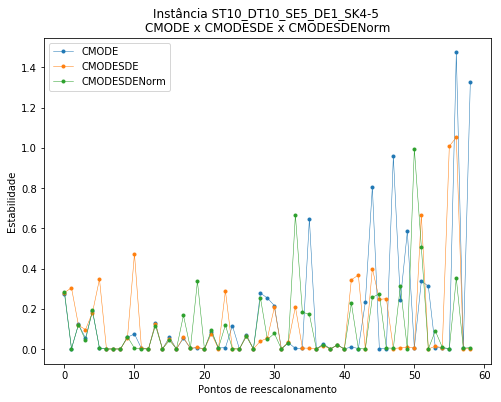

In [12]:
plot_stab(stab_event, inst, algorithms)

In [13]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=17.433, p=1.638324E-04
Distribuições diferentes (rejeitar H0)


In [14]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.763, p=1.523833E-01
Mesmas distribuições (falhou em rejeitar H0)


In [15]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=0.597, p=7.419827E-01
Mesmas distribuições (falhou em rejeitar H0)


In [16]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODE,CMODESDE,CMODESDENorm
CMODE,-1.00E+00,8.95E-01,8.13E-01
CMODESDE,8.95E-01,-1.00E+00,7.12E-01
CMODESDENorm,8.13E-01,7.12E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3c25111cf8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f3c2300cdd8>)

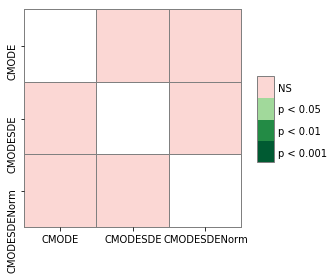

In [17]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK6-7

None

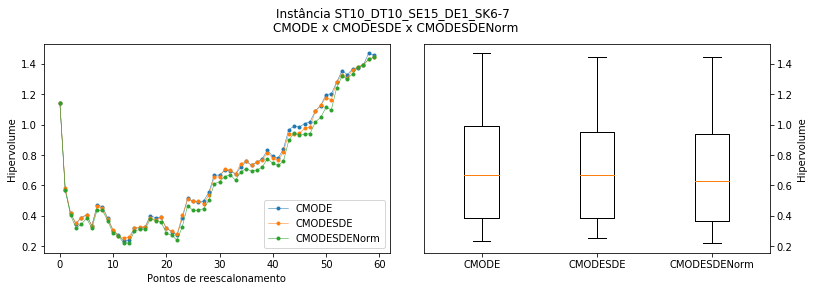

In [18]:
inst = "ST10_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODE", "CMODESDE", "CMODESDENorm"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

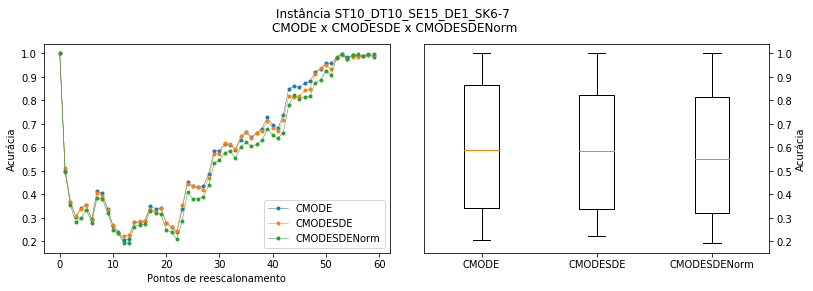

In [19]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

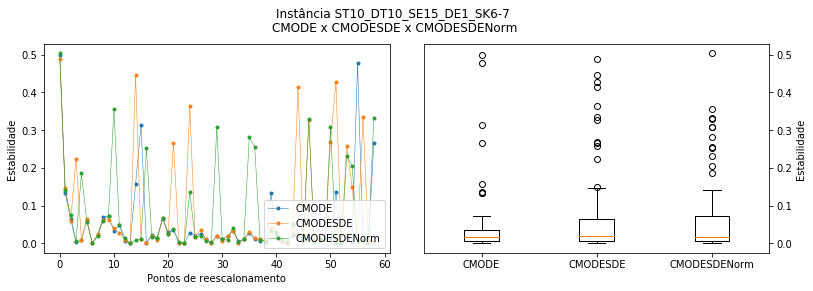

In [20]:
display(combined_plot_stab(stab_event, inst, algorithms))

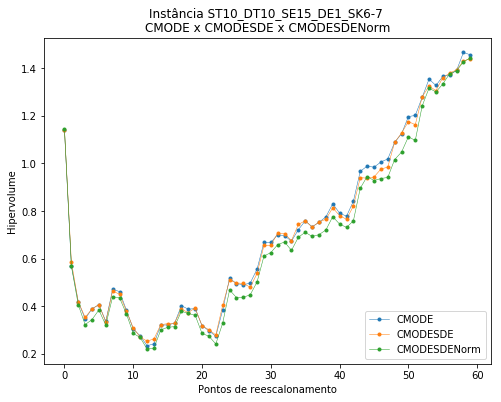

In [21]:
plot_hv(hv_event, inst, algorithms)

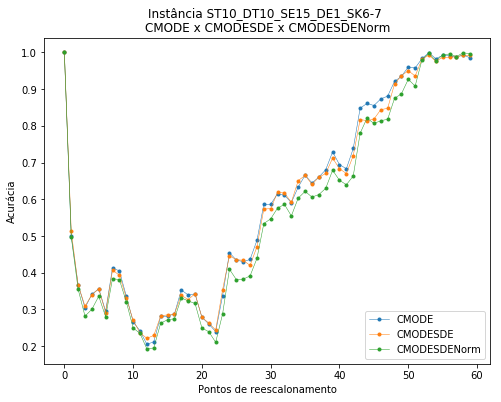

In [22]:
plot_acc(acc_event, inst, algorithms)

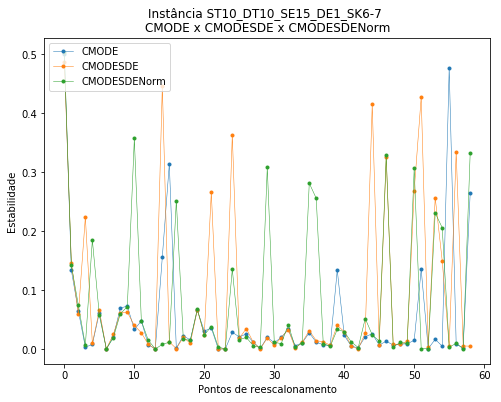

In [23]:
plot_stab(stab_event, inst, algorithms)

In [24]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=75.700, p=3.647152E-17
Distribuições diferentes (rejeitar H0)


In [25]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=57.898, p=2.676349E-13
Distribuições diferentes (rejeitar H0)


In [26]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.498, p=1.739654E-01
Mesmas distribuições (falhou em rejeitar H0)


In [27]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODE,CMODESDE,CMODESDENorm
CMODE,-1.00E+00,9.62E-01,4.55E-01
CMODESDE,9.62E-01,-1.00E+00,4.84E-01
CMODESDENorm,4.55E-01,4.84E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3c22f4a8d0>,
 <matplotlib.colorbar.ColorbarBase at 0x7f3c251cbc18>)

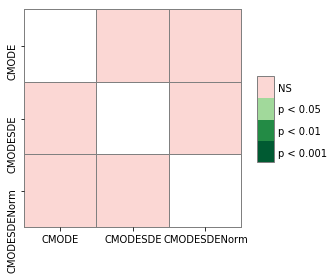

In [28]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK6-7

None

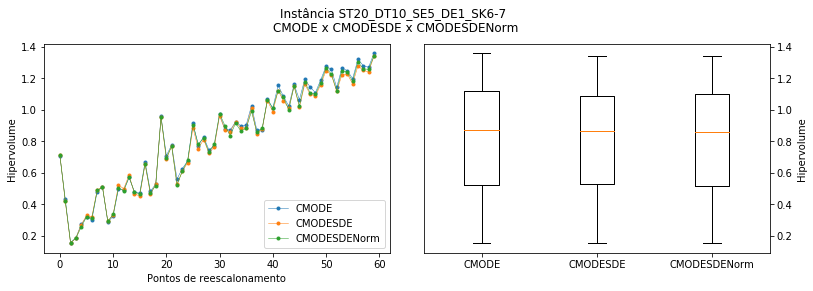

In [29]:
inst = "ST20_DT10_SE5_DE1_SK6-7" 
algorithms = ["CMODE", "CMODESDE", "CMODESDENorm"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

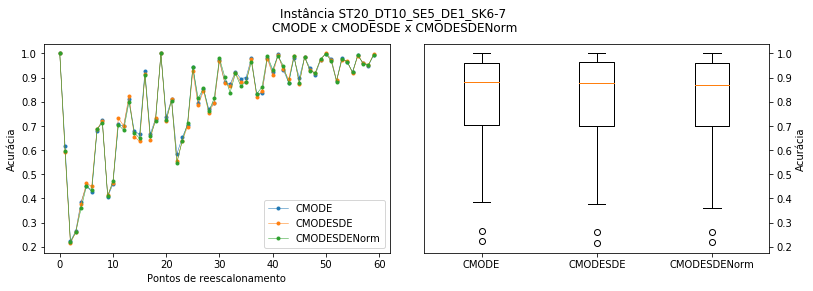

In [30]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

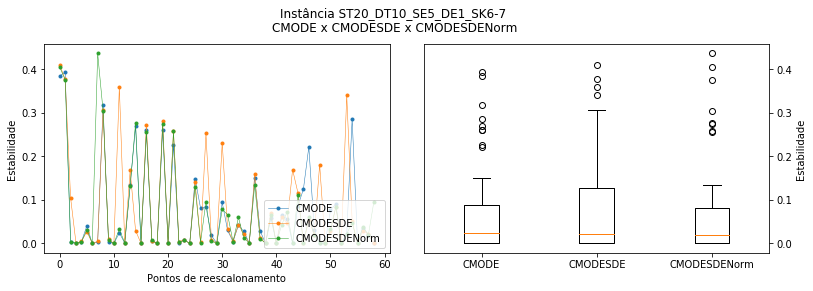

In [31]:
display(combined_plot_stab(stab_event, inst, algorithms))

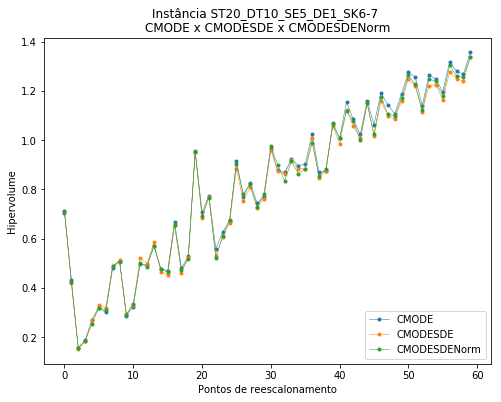

In [32]:
plot_hv(hv_event, inst, algorithms)

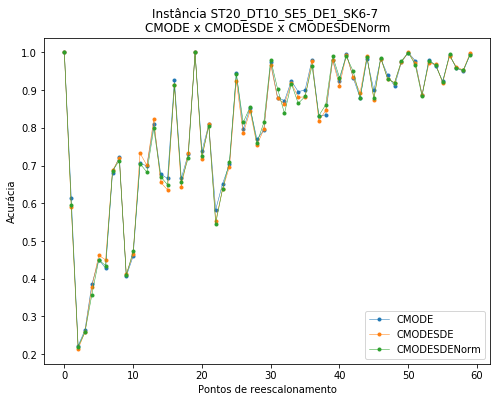

In [33]:
plot_acc(acc_event, inst, algorithms)

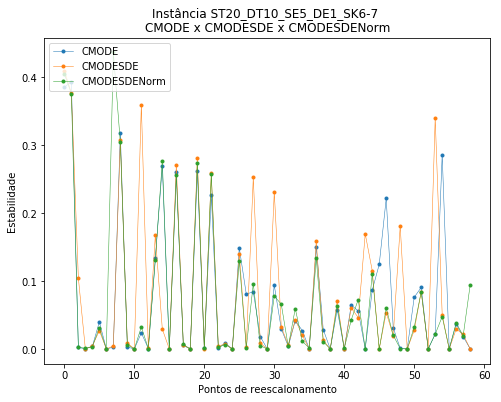

In [34]:
plot_stab(stab_event, inst, algorithms)

In [35]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=33.633, p=4.972954E-08
Distribuições diferentes (rejeitar H0)


In [36]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.724, p=1.553509E-01
Mesmas distribuições (falhou em rejeitar H0)


In [37]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=2.744, p=2.536349E-01
Mesmas distribuições (falhou em rejeitar H0)


In [38]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODE,CMODESDE,CMODESDENorm
CMODE,-1.00E+00,7.63E-01,8.37E-01
CMODESDE,7.63E-01,-1.00E+00,9.24E-01
CMODESDENorm,8.37E-01,9.24E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3c215dc400>,
 <matplotlib.colorbar.ColorbarBase at 0x7f3c2527d080>)

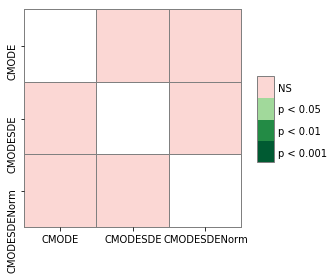

In [39]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK4-5

None

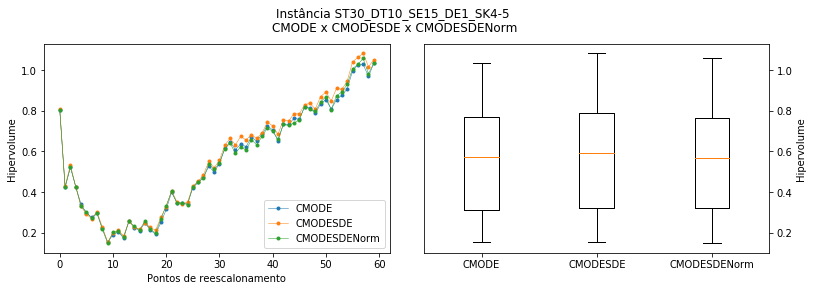

In [40]:
inst = "ST30_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODE", "CMODESDE", "CMODESDENorm"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

display(combined_plot_hv(hv_event, inst, algorithms))

None

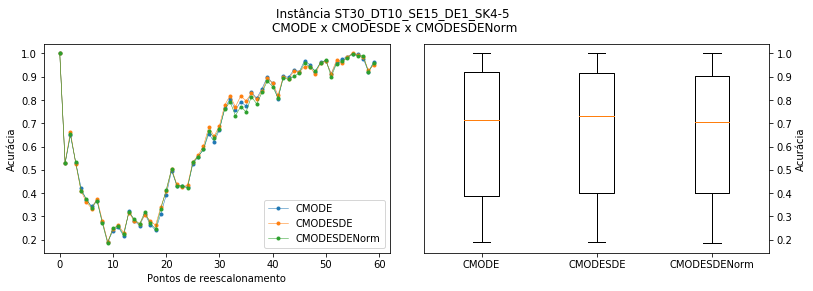

In [41]:
display(combined_plot_acc(acc_event, inst, algorithms))

None

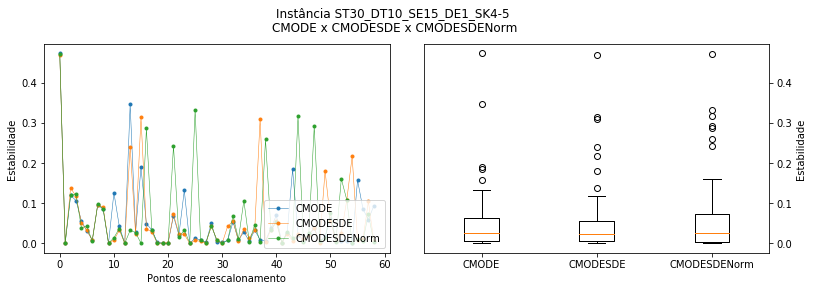

In [42]:
display(combined_plot_stab(stab_event, inst, algorithms))

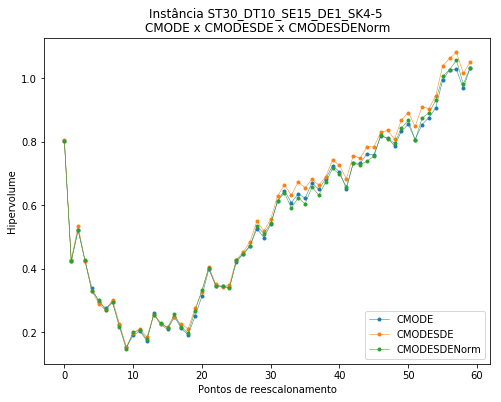

In [43]:
plot_hv(hv_event, inst, algorithms)

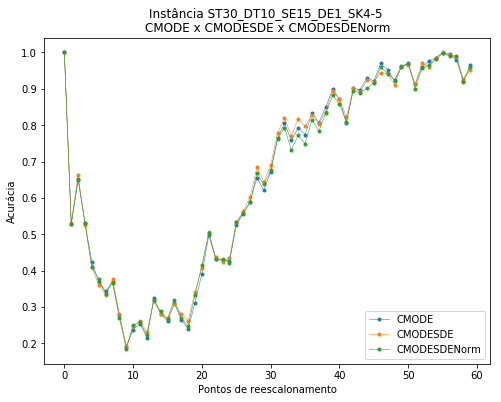

In [44]:
plot_acc(acc_event, inst, algorithms)

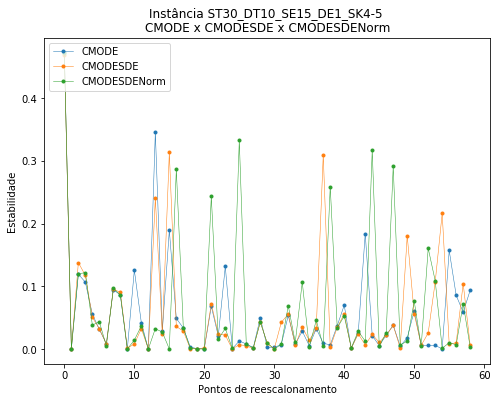

In [45]:
plot_stab(stab_event, inst, algorithms)

In [46]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=48.700, p=2.660292E-11
Distribuições diferentes (rejeitar H0)


In [47]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=10.407, p=5.497896E-03
Distribuições diferentes (rejeitar H0)


In [48]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=1.879, p=3.908647E-01
Mesmas distribuições (falhou em rejeitar H0)


In [49]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,CMODE,CMODESDE,CMODESDENorm
CMODE,-1.00E+00,6.84E-01,9.83E-01
CMODESDE,6.84E-01,-1.00E+00,6.99E-01
CMODESDENorm,9.83E-01,6.99E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3c22f967b8>,
 <matplotlib.colorbar.ColorbarBase at 0x7f3c254091d0>)

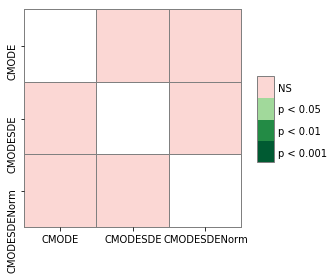

In [50]:
sp.sign_plot(pc, **heatmap_args)